In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(1)
np.random.seed(1)

In [2]:
# Hyper Parameters
BATCH_SIZE = 64 
TIME_STEP = 28 # rnn time step == image height
INPUT_SIZE = 28 # rnn input size == image width
LR = 0.01 # Learning rate

In [9]:
# Load data 
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) # they have been normalized to range(0, 1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

print('Train images:', mnist.train.images.shape)
print('Train labels:', mnist.train.labels.shape)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Train images: (55000, 784)
Train labels: (55000, 10)


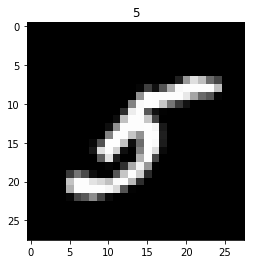

In [18]:
# take a look
tmp_idx = np.random.randint(0, 2000, 1)
tmp_img = mnist.train.images[tmp_idx]
plt.imshow(tmp_img.reshape((28, 28)), cmap='gray')
plt.title('%i'%np.argmax(mnist.train.labels[tmp_idx]))
plt.show()

In [21]:
with tf.Graph().as_default(), tf.Session() as sess:
    # train dataset
    tf_x = tf.placeholder(tf.float32, [None, TIME_STEP*INPUT_SIZE]) # shape(batch, 784)
    image = tf.reshape(tf_x, [-1, TIME_STEP, INPUT_SIZE]) # (batch, height, width)
    tf_y = tf.placeholder(tf.int32, [None, 10]) # input y
    # rnn 
    rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)
    outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
        rnn_cell, # cell
        image,  # input
        initial_state=None, # the initial hidden state
        dtype=tf.float32, # must given if set initial_state =None
        time_major=False, # False: (batch, time_step, input); True:(time_step, batch, input)
    )
    output = tf.layers.dense(outputs[:, -1, :], 10) # output based on the last output step
    
    loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output) # compute cost
    train_op = tf.train.AdamOptimizer(LR).minimize(loss)
    
    accuracy = tf.metrics.accuracy(
        labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),
    )[1]
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) 
    sess.run(init_op)
    
    for step in range(1200): #trainning
        b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
        _, loss_ = sess.run([train_op, loss], {tf_x:b_x, tf_y:b_y})
        if step % 50==0:
            accuracy_ = sess.run(accuracy, {tf_x:b_x, tf_y:b_y})
            print('Train loss: %.4f'%loss_, '|test accuracy: %.2f'%accuracy_)
    # print 10 predictions from test data
    test_output = sess.run(output, {tf_x:test_x[:10]})
    pred_y = np.argmax(test_output, 1)
    print(pred_y, 'prediction number')
    print(np.argmax(test_y[:10], 1), 'real number')

Train loss: 2.2971 |test accuracy: 0.39
Train loss: 0.6014 |test accuracy: 0.59
Train loss: 0.3653 |test accuracy: 0.69
Train loss: 0.3332 |test accuracy: 0.74
Train loss: 0.3517 |test accuracy: 0.77
Train loss: 0.3857 |test accuracy: 0.80
Train loss: 0.3124 |test accuracy: 0.81
Train loss: 0.1780 |test accuracy: 0.83
Train loss: 0.1646 |test accuracy: 0.85
Train loss: 0.1150 |test accuracy: 0.86
Train loss: 0.1067 |test accuracy: 0.87
Train loss: 0.2188 |test accuracy: 0.88
Train loss: 0.1527 |test accuracy: 0.88
Train loss: 0.2048 |test accuracy: 0.89
Train loss: 0.1580 |test accuracy: 0.89
Train loss: 0.1725 |test accuracy: 0.90
Train loss: 0.0243 |test accuracy: 0.90
Train loss: 0.1191 |test accuracy: 0.91
Train loss: 0.2360 |test accuracy: 0.91
Train loss: 0.1566 |test accuracy: 0.91
Train loss: 0.1013 |test accuracy: 0.92
Train loss: 0.0982 |test accuracy: 0.92
Train loss: 0.1491 |test accuracy: 0.92
Train loss: 0.1095 |test accuracy: 0.92
[7 2 1 0 4 1 4 9 6 9] prediction number
